In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('C:/Users/Aravind/Work/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/data/external/milknew.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [6]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


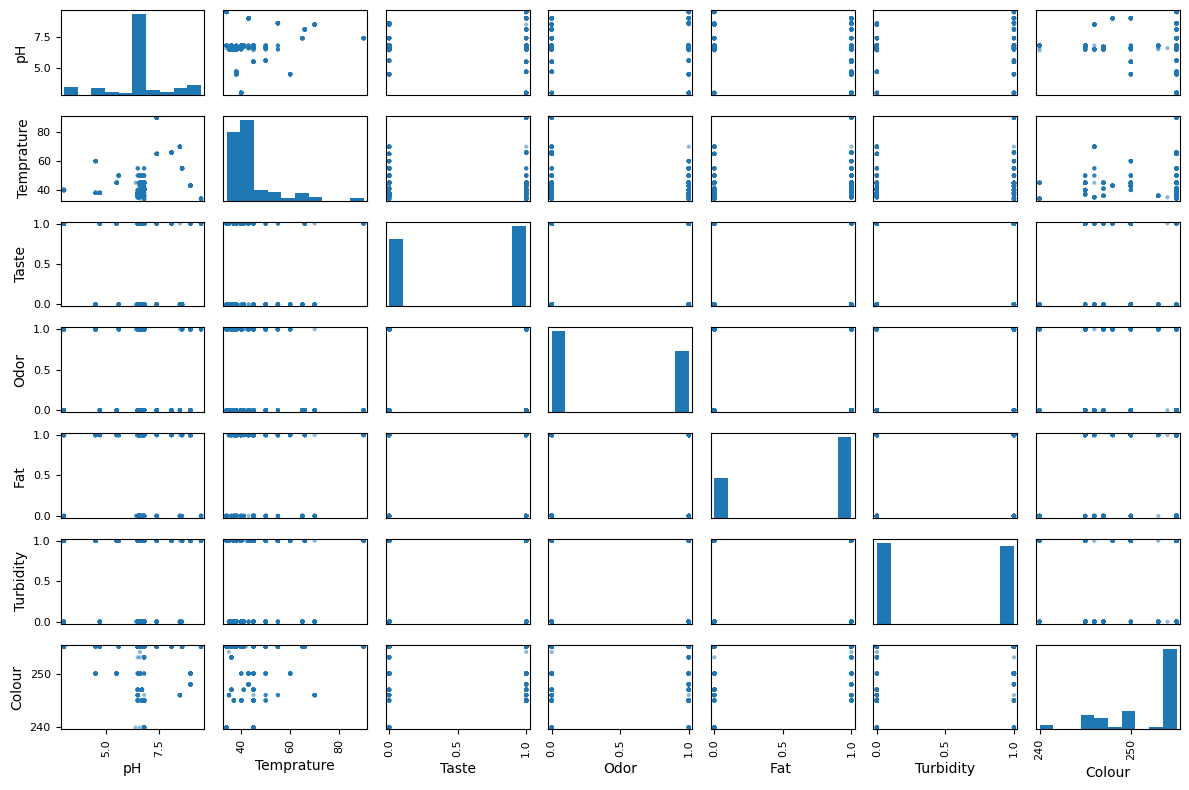

In [7]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = [i for i in data.columns]
scatter_matrix(data[attributes] , figsize=(12,8))
plt.tight_layout()
plt.show()

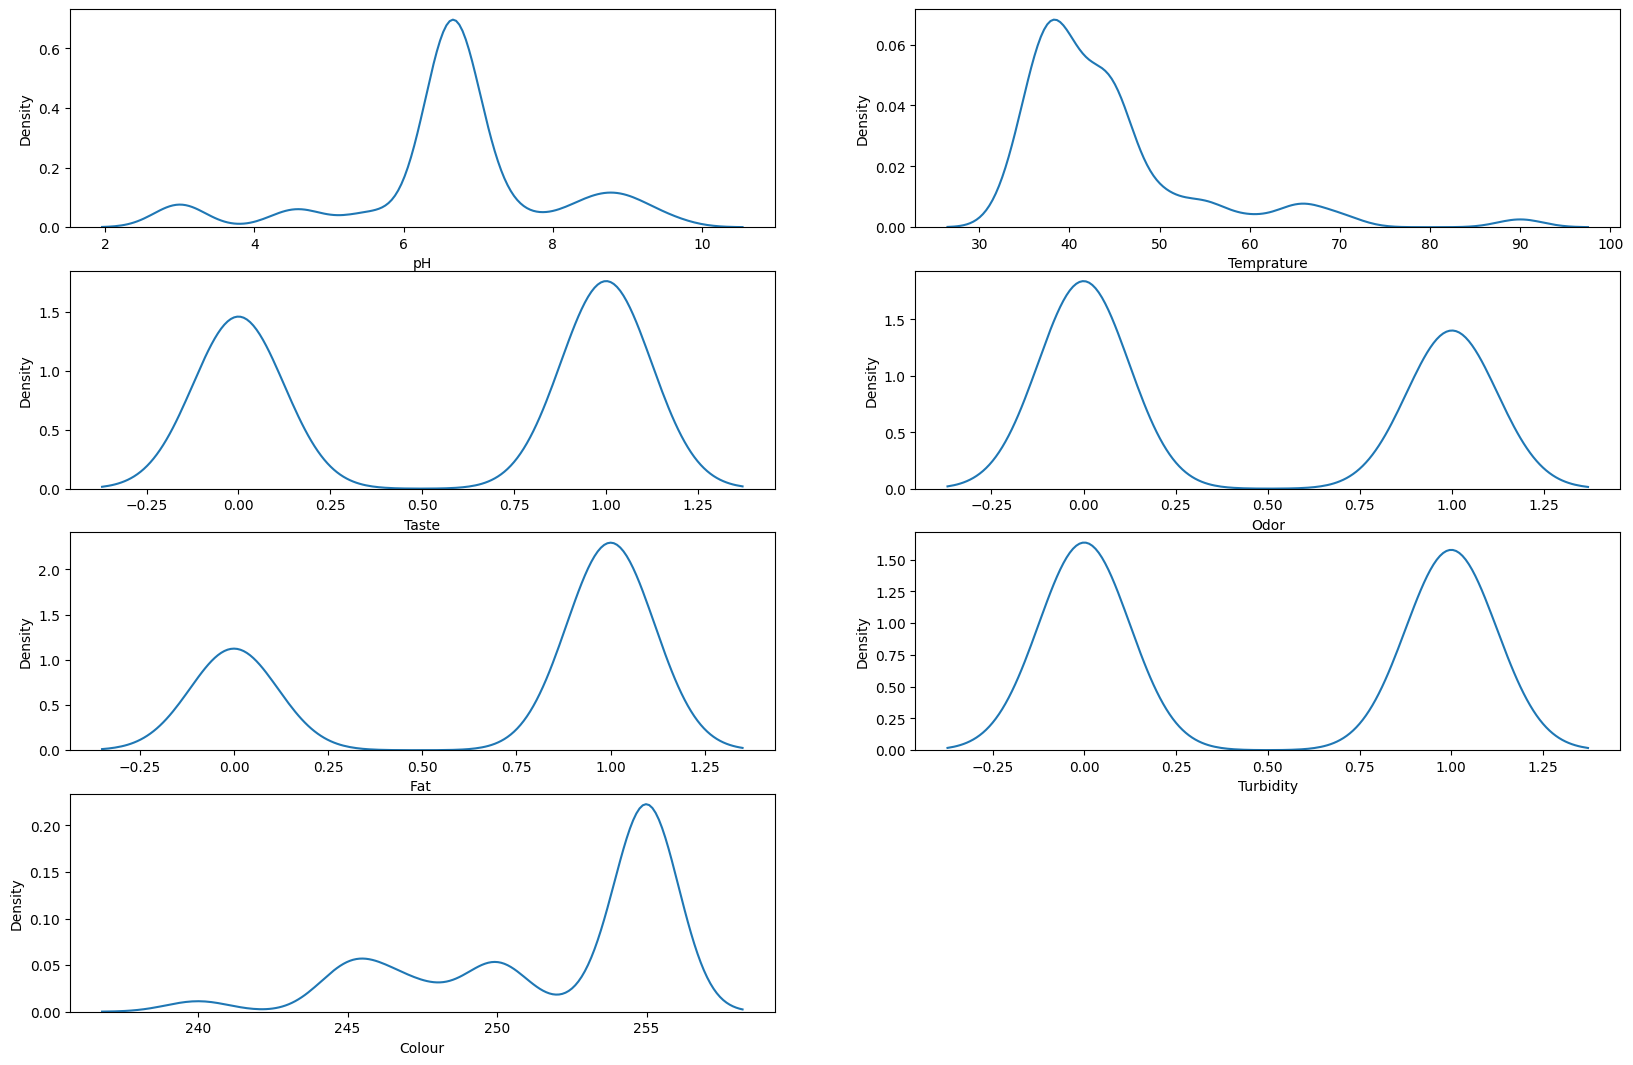

In [8]:
import seaborn as sn

plt.figure(figsize=(20,30))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sn.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [9]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data[['Grade']] = encoder.fit_transform(data[['Grade']])


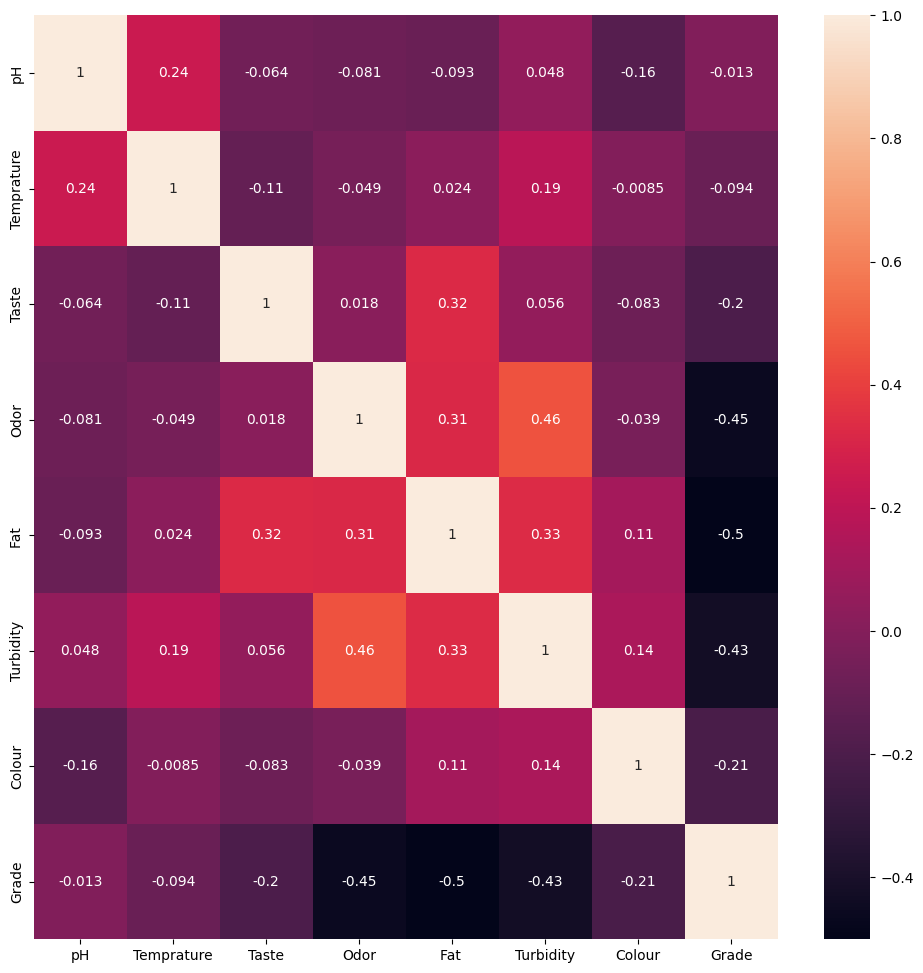

In [10]:
plt.figure(figsize=(12,12))
sn.heatmap(data.corr(), annot=True)
plt.show()

In [11]:
X = data.drop(['Grade'],axis=1)
y = data['Grade']

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca_reduced = pca.fit_transform(X)

In [13]:
X_pca_reduced.shape

(1059, 2)

In [14]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.20 , random_state=42)


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
import lightgbm as lgbm

lgbm_clf = lgbm.LGBMClassifier(n_estimators=100, max_depth=10 , random_state=42)
lgbm_clf.fit(X_train , y_train)
y_pred = lgbm_clf.predict(X_test)

lgbm_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {lgbm_acc} %")

Accuracy of the model : 99.05660377358491 %


In [17]:
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_clf.fit(X_train , y_train)
y_pred = adb_clf.predict(X_test)

adb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {adb_acc} %")


Accuracy of the model : 92.45283018867924 %


In [20]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_clf = HistGradientBoostingClassifier(random_state=42)
hgb_clf.fit(X_train , y_train)
y_pred = hgb_clf.predict(X_test)

hgb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {hgb_acc} %")

Accuracy of the model : 99.05660377358491 %


In [21]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=30 , random_state=42)
svm_clf.fit(X_train , y_train)
y_pred = svm_clf.predict(X_test)

svm_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {svm_acc} %")

Accuracy of the model : 63.20754716981132 %


In [22]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(C=30 , random_state=42)
log_clf.fit(X_train , y_train)
y_pred = log_clf.predict(X_test)

log_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {log_acc} %")

Accuracy of the model : 69.81132075471697 %


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train , y_train)
y_pred = knn_clf.predict(X_test)

knn_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {knn_acc} %")


Accuracy of the model : 98.58490566037736 %


In [24]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train , y_train)
y_pred = nb_clf.predict(X_test)

nb_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {nb_acc} %")

Accuracy of the model : 94.33962264150944 %


In [25]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN' , 'Linear SVC' , 'GaussianNB' ,  'LightGBM' , 'AdaBoost' ,  'HistGradientBoosting'],
    'Score': [log_acc , knn_acc , svm_acc , nb_acc ,  lgbm_acc , adb_acc , hgb_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,LightGBM,99.056604
6,HistGradientBoosting,99.056604
1,KNN,98.584906
3,GaussianNB,94.339623
5,AdaBoost,92.452830
0,Logistic Regression,69.811321
2,Linear SVC,63.207547


In [30]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators = [
        ('Logistic Regression ',log_clf),
        ('LightGBM ',lgbm_clf),
        ('HistGradientBoosting', hgb_clf),
        ('GaussianNB' , nb_clf),
        ('Linear SVM' , svm_clf)
    ],
    final_estimator = lgbm_clf , cv = 5
)
stacking_clf.fit(X_train , y_train)

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression ',
                                LogisticRegression(C=30, random_state=42)),
                               ('LightGBM ',
                                LGBMClassifier(max_depth=10, random_state=42)),
                               ('HistGradientBoosting',
                                HistGradientBoostingClassifier(random_state=42)),
                               ('GaussianNB', GaussianNB()),
                               ('Linear SVM',
                                LinearSVC(C=30, random_state=42))],
                   final_estimator=LGBMClassifier(max_depth=10,
                                                  random_state=42))

In [31]:
y_pred = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {stacking_acc} %")

Accuracy of the model : 99.05660377358491 %


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        48
         1.0       1.00      0.99      0.99        78
         2.0       0.99      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



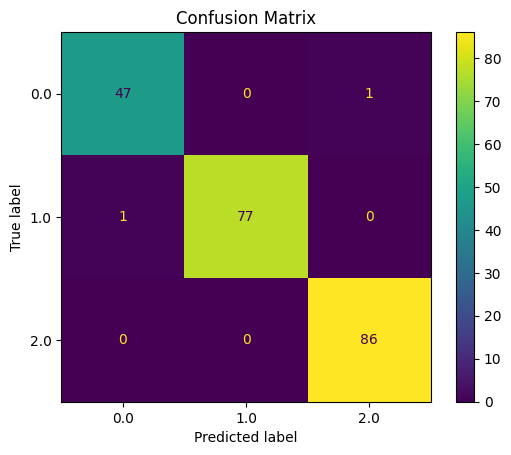

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)
plt.title("Confusion Matrix")
plt.show()

In [34]:
import joblib

joblib.dump(stacking_clf , 'C:/Users/Aravind/Work/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/models/Milk Quality/model.pkl')

['C:/Users/Aravind/Work/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/models/Milk Quality/model.pkl']